## 1. Load Data

In [1]:
#load in necessary packages
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import seaborn as sns


In [2]:
df = pd.read_csv('olineman_full2.csv')

In [3]:
df.head()

,displayName,pff_positionLinedUp,x_std,y_std,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,gameId,playId,nflId,team,down,yardsToGo,defensiveTeam,homeOrAway,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,penaltyCommitted,olineman_win,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed
0,Donovan Smith,LT,41.55,26.89,5.545260,1.012640,33,2.151279,53504.0,1.293406,42404.0,4.627883,25511.0,3.162183,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
1,Donovan Smith,LT,41.54,26.88,5.431814,1.012640,33,2.161227,53504.0,1.287051,42404.0,4.605779,25511.0,3.049098,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
2,Donovan Smith,LT,41.53,26.89,3.869395,0.991871,33,2.172211,53504.0,1.296534,42404.0,4.591841,25511.0,3.067507,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
3,Donovan Smith,LT,41.50,26.89,3.013485,0.991871,33,2.211990,53504.0,1.306331,42404.0,4.602445,25511.0,3.059412,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
4,Donovan Smith,LT,41.46,26.91,2.924474,0.963247,33,2.253908,53504.0,1.348332,42404.0,4.608188,25511.0,3.021523,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0


In [4]:
df = df[df.penaltyCommitted != 1]

In [5]:
df.head()

,displayName,pff_positionLinedUp,x_std,y_std,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,gameId,playId,nflId,team,down,yardsToGo,defensiveTeam,homeOrAway,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,penaltyCommitted,olineman_win,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed
0,Donovan Smith,LT,41.55,26.89,5.545260,1.012640,33,2.151279,53504.0,1.293406,42404.0,4.627883,25511.0,3.162183,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
1,Donovan Smith,LT,41.54,26.88,5.431814,1.012640,33,2.161227,53504.0,1.287051,42404.0,4.605779,25511.0,3.049098,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
2,Donovan Smith,LT,41.53,26.89,3.869395,0.991871,33,2.172211,53504.0,1.296534,42404.0,4.591841,25511.0,3.067507,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
3,Donovan Smith,LT,41.50,26.89,3.013485,0.991871,33,2.211990,53504.0,1.306331,42404.0,4.602445,25511.0,3.059412,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
4,Donovan Smith,LT,41.46,26.91,2.924474,0.963247,33,2.253908,53504.0,1.348332,42404.0,4.608188,25511.0,3.021523,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0


In [6]:
pd.options.display.min_rows = 115
df.isnull().sum()
print(df.isna().sum())

displayName                    0
pff_positionLinedUp            0
x_std                          0
y_std                          0
dir_std                        0
o_std                          0
yardLine_std                   0
Opp_Dist                       0
closestOpp_Id                  0
Team_Dist                      0
closestTeam_Id                 0
QB_Dist                        0
closestQB_Id                   0
FootDist                       0
secondsIntoGame                0
gameId                         0
playId                         0
nflId                          0
team                           0
down                           0
yardsToGo                      0
defensiveTeam                  0
homeOrAway                     0
preSnapHomeScore               0
preSnapVisitorScore            0
pff_nflIdBlockedPlayer     44284
offenseFormation            1446
personnelO                   180
defendersInBox              1446
personnelD                   180
dropBackTy

In [7]:
df.defendersInBox = df.defendersInBox[df.defendersInBox.isna()] = 0

In [8]:
df.pff_nflIdBlockedPlayer = df.pff_nflIdBlockedPlayer[df.pff_nflIdBlockedPlayer.isna()] = 0

In [9]:
df[df.pff_sackAllowed.isna()]

,displayName,pff_positionLinedUp,x_std,y_std,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,gameId,playId,nflId,team,down,yardsToGo,defensiveTeam,homeOrAway,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,penaltyCommitted,olineman_win,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed
320452,Zach Ertz,LT,47.12,31.523333,1.494002,0.926595,38,2.537124,42381.0,1.847647,39965.0,5.538881,47784.0,3.477140,3638,2021102800,3007,39983.0,ARI,2,8,GB,home,14,24,0,SHOTGUN,"1 RB, 2 TE, 2 WR",0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,1,Cover-3,Zone,0,0,NaN,NaN,NaN,NaN
320453,Zach Ertz,LT,47.13,31.523333,0.696735,0.949110,38,2.525074,42381.0,1.847647,39965.0,5.546576,47784.0,3.475198,3638,2021102800,3007,39983.0,ARI,2,8,GB,home,14,24,0,SHOTGUN,"1 RB, 2 TE, 2 WR",0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,1,Cover-3,Zone,0,0,NaN,NaN,NaN,NaN
320454,Zach Ertz,LT,47.14,31.533333,0.803375,0.962549,38,2.496878,42381.0,1.860108,39965.0,5.554278,47784.0,3.483102,3638,2021102800,3007,39983.0,ARI,2,8,GB,home,14,24,0,SHOTGUN,"1 RB, 2 TE, 2 WR",0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,1,Cover-3,Zone,0,0,NaN,NaN,NaN,NaN
320455,Zach Ertz,LT,47.16,31.543333,0.689929,0.962549,38,2.463433,42381.0,1.866012,39965.0,5.590143,47784.0,3.489198,3638,2021102800,3007,39983.0,ARI,2,8,GB,home,14,24,0,SHOTGUN,"1 RB, 2 TE, 2 WR",0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,1,Cover-3,Zone,0,0,NaN,NaN,NaN,NaN
320456,Zach Ertz,LT,47.20,31.563333,0.482758,0.962549,38,2.395767,42381.0,1.887882,39965.0,5.626011,47784.0,3.501785,3638,2021102800,3007,39983.0,ARI,2,8,GB,home,14,24,0,SHOTGUN,"1 RB, 2 TE, 2 WR",0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,1,Cover-3,Zone,0,0,NaN,NaN,NaN,NaN
320457,Zach Ertz,LT,47.27,31.583333,0.370010,0.919963,38,2.290087,42381.0,1.899737,39965.0,5.699140,47784.0,3.738369,3638,2021102800,3007,39983.0,ARI,2,8,GB,home,14,24,0,SHOTGUN,"1 RB, 2 TE, 2 WR",0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,1,Cover-3,Zone,0,0,NaN,NaN,NaN,NaN
320458,Zach Ertz,LT,47.33,31.623333,0.446804,0.889420,38,2.162267,42381.0,1.880957,53478.0,5.770910,47784.0,3.815600,3638,2021102800,3007,39983.0,ARI,2,8,GB,home,14,24,0,SHOTGUN,"1 RB, 2 TE, 2 WR",0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,1,Cover-3,Zone,0,0,NaN,NaN,NaN,NaN
320459,Zach Ertz,LT,47.41,31.663333,0.469843,0.865509,38,2.032978,42381.0,1.918880,39965.0,5.865978,47784.0,4.054060,3638,2021102800,3007,39983.0,ARI,2,8,GB,home,14,24,0,SHOTGUN,"1 RB, 2 TE, 2 WR",0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,1,Cover-3,Zone,0,0,NaN,NaN,NaN,NaN
320460,Zach Ertz,LT,47.51,31.713333,0.462512,0.734260,38,1.864323,42381.0,1.916690,39965.0,5.983018,47784.0,4.418744,3638,2021102800,3007,39983.0,ARI,2,8,GB,home,14,24,0,SHOTGUN,"1 RB, 2 TE, 2 WR",0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,1,Cover-3,Zone,0,0,NaN,NaN,NaN,NaN
320461,Zach Ertz,LT,47.62,31.763333,0.453786,0.718028,38,1.681904,42381.0,1.927200,39965.0,6.108044,47784.0,4.878873,3638,2021102800,3007,39983.0,ARI,2,8,GB,home,14,24,0,SHOTGUN,"1 RB, 2 TE, 2 WR",0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,1,Cover-3,Zone,0,0,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna()

## 2. Binary Classifier

In [11]:
X = df.drop(['olineman_win' ,'pff_beatenByDefender',
                  'pff_hitAllowed', 'pff_hurryAllowed', 'pff_sackAllowed'], axis = 1)
X = X.drop(['team', 'defensiveTeam'], axis = 1)
dummies = pd.get_dummies(X[['pff_positionLinedUp', 'homeOrAway', 'offenseFormation', 'personnelO', 'personnelD', 'dropBackType', 'pff_passCoverage', 'pff_passCoverageType']])
X = X.drop(['pff_positionLinedUp', 'homeOrAway', 'offenseFormation', 'personnelO', 'personnelD', 'dropBackType', 'pff_passCoverage', 'pff_passCoverageType'], axis = 1)
X = X.join(dummies)

y = df[['olineman_win', 'pff_beatenByDefender',
                   'pff_hitAllowed', 'pff_hurryAllowed', 'pff_sackAllowed']]

In [12]:
X = X.drop(['displayName', 'x_std', 'y_std', 'nflId', 'playId', 'gameId', 'pff_positionLinedUp_C', 'offenseFormation_JUMBO','personnelO_6 OL, 2 RB, 2 TE, 0 WR', 'personnelD_6 DL, 1 LB, 4 DB', 'homeOrAway_away', 'dropBackType_UNKNOWN', 'pff_passCoverage_Miscellaneous', 'pff_passCoverageType_Other'], axis = 1)

### 2.1 Under Sampling

olineman_win  pff_beatenByDefender  pff_hitAllowed  pff_hurryAllowed  pff_sackAllowed
1             0.0                   0.0             0.0               0.0                1505099
0             0.0                   0.0             1.0               0.0                  81708
              1.0                   0.0             0.0               0.0                  64069
              0.0                   1.0             0.0               0.0                  17879
                                    0.0             0.0               1.0                  15011
dtype: int64


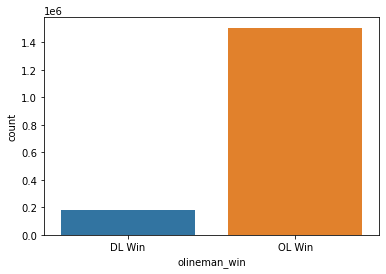

In [13]:
#plot
print(y.value_counts())
class_names = ['DL Win','OL Win']
ax = sns.countplot(x=y.olineman_win); 
ax.set_xticklabels(class_names)
plt.show()

In [14]:
df2 = X.join(y.olineman_win)

y = y.drop('olineman_win', axis = 1)
df4 = X.join(y)

In [15]:
# Divide by class
df_class_0    = df2[df2['olineman_win'] == 0] #class with more samples
df_class_1    = df2[df2['olineman_win'] == 1] #class with fewer samples
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)

Random Under-Sampling:
1    178667
0    178667
Name: olineman_win, dtype: int64


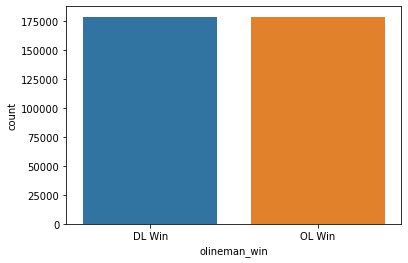

In [16]:
df_class_1_under = df_class_1.sample(count_class_0, replace=True)
df_under         = pd.concat([df_class_1_under, df_class_0], axis=0)
print('Random Under-Sampling:')
print(df_under.olineman_win.value_counts())
#plot
ax = sns.countplot(x=df_under['olineman_win']); 
ax.set_xticklabels(class_names)
plt.show()

In [17]:
df_under.head()

,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,defendersInBox,pff_playAction,penaltyCommitted,pff_positionLinedUp_LG,pff_positionLinedUp_LT,pff_positionLinedUp_RG,pff_positionLinedUp_RT,homeOrAway_home,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT,"personnelO_0 RB, 0 TE, 5 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_1 RB, 1 TE, 2 WR,1 LB","personnelO_1 RB, 1 TE, 3 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_1 RB, 4 TE, 0 WR","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_2 QB, 1 RB, 3 TE, 0 WR","personnelO_2 QB, 2 RB, 0 TE, 2 WR","personnelO_2 QB, 2 RB, 1 TE, 1 WR","personnelO_2 QB, 6 OL, 1 RB, 1 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR","personnelO_2 RB, 1 TE, 2 WR","personnelO_2 RB, 2 TE, 1 WR",...,"personnelO_7 OL, 1 RB, 0 TE, 2 WR","personnelD_0 DL, 3 LB, 8 DB","personnelD_0 DL, 5 LB, 6 DB","personnelD_1 DL, 2 LB, 8 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_2 DL, 5 LB, 4 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_4 DL, 4 LB, 3 DB","personnelD_4 DL, 5 LB, 2 DB","personnelD_4 DL, 6 LB, 1 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_5 DL, 5 LB, 1 DB","personnelD_6 DL, 2 LB, 3 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_6 DL, 4 LB, 1 DB",dropBackType_DESIGNED_ROLLOUT_LEFT,dropBackType_DESIGNED_ROLLOUT_RIGHT,dropBackType_DESIGNED_RUN,dropBackType_SCRAMBLE,dropBackType_SCRAMBLE_ROLLOUT_LEFT,dropBackType_SCRAMBLE_ROLLOUT_RIGHT,dropBackType_TRADITIONAL,pff_passCoverage_2-Man,pff_passCoverage_Bracket,pff_passCoverage_Cover-0,pff_passCoverage_Cover-1,pff_passCoverage_Cover-2,pff_passCoverage_Cover-3,pff_passCoverage_Cover-6,pff_passCoverage_Goal Line,pff_passCoverage_Prevent,pff_passCoverage_Quarters,pff_passCoverage_Red Zone,pff_passCoverageType_Man,pff_passCoverageType_Zone,olineman_win
156817,3.345273,6.268699,10,1.173882,43321.0,2.635906,42765.0,3.551408,43291.0,3.895125,2076,2,13,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
645890,0.496721,0.854862,35,2.199136,46146.0,0.867006,46101.0,0.867006,46101.0,1.206690,3287,2,10,17,27,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
688961,3.309842,6.061878,25,0.888144,46214.0,2.484854,41291.0,2.484854,41291.0,2.156965,2624,1,10,13,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1425286,4.073075,0.184132,27,1.168674,43455.0,1.857794,43433.0,5.238024,46240.0,4.718411,2524,2,8,7,14,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1803856,3.195523,0.163014,38,1.062121,53441.0,1.805464,53586.0,4.708142,38632.0,4.832070,4454,1,10,16,20,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [18]:
X = df_under.drop(['olineman_win'], axis = 1)
y = df_under.olineman_win

Undersample because very large dataset

### 2.2 Random Forest

In [19]:
#train test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# param_grid = {
#     "n_estimators": [90, 120],
#     "criterion":("gini", "entropy"), 
#     "max_depth":([15,20])
# }
# #Random forest classifier
# clf = RandomForestClassifier(bootstrap=False,random_state=42)
# tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
# tree_cv.fit(X_tr, y_tr)
# best_params = tree_cv.best_params_
# print(f"Best paramters: {best_params})")
# #
# clf = RandomForestClassifier(**best_params,random_state=42)
# clf.fit(X_tr, y_tr)
# y_pred = clf.predict(X_te)
# #
# acc = accuracy_score(y_te, y_pred)
# cm = confusion_matrix(y_te, y_pred)
# fig, ax = plt.subplots(figsize=(5, 3),dpi= 100)
# ax =sns.heatmap(cm/np.sum(cm),annot = True,cmap = "inferno",xticklabels=class_names,yticklabels=class_names)
# plt.yticks(rotation=0) 
# plt.title('accuracy = %3.3f'%acc)
# ax.axis('equal')
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# plt.show()

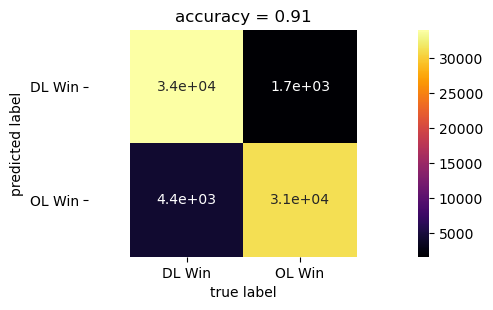

In [21]:
#Random forest classifier
clf = RandomForestClassifier(n_estimators=90,random_state=42,max_depth=20)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)
acc = accuracy_score(y_te, y_pred)
cm = confusion_matrix(y_te, y_pred)
fig, ax = plt.subplots(figsize=(5, 3),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
ax.axis('equal')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [22]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     35685
           1       0.95      0.88      0.91     35782

    accuracy                           0.91     71467
   macro avg       0.92      0.91      0.91     71467
weighted avg       0.92      0.91      0.91     71467



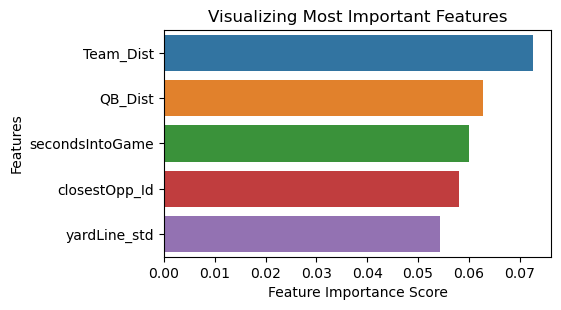

In [23]:
#view feature importance
features = X.columns.tolist()
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False).head(5)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(5, 3),dpi= 100)  #original shape was 8.1, 10
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Most Important Features")
plt.show()

### Make DF of Predictions and Rank Olinemen

In [24]:
df.head()

,displayName,pff_positionLinedUp,x_std,y_std,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,gameId,playId,nflId,team,down,yardsToGo,defensiveTeam,homeOrAway,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,penaltyCommitted,olineman_win,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed
0,Donovan Smith,LT,41.55,26.89,5.545260,1.012640,33,2.151279,53504.0,1.293406,42404.0,4.627883,25511.0,3.162183,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
1,Donovan Smith,LT,41.54,26.88,5.431814,1.012640,33,2.161227,53504.0,1.287051,42404.0,4.605779,25511.0,3.049098,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
2,Donovan Smith,LT,41.53,26.89,3.869395,0.991871,33,2.172211,53504.0,1.296534,42404.0,4.591841,25511.0,3.067507,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
3,Donovan Smith,LT,41.50,26.89,3.013485,0.991871,33,2.211990,53504.0,1.306331,42404.0,4.602445,25511.0,3.059412,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0
4,Donovan Smith,LT,41.46,26.91,2.924474,0.963247,33,2.253908,53504.0,1.348332,42404.0,4.608188,25511.0,3.021523,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0,0,0.0,0.0,1.0,0.0


In [25]:
X_final = df2.drop([ 'olineman_win'], axis = 1)
X_final.head()

,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,defendersInBox,pff_playAction,penaltyCommitted,pff_positionLinedUp_LG,pff_positionLinedUp_LT,pff_positionLinedUp_RG,pff_positionLinedUp_RT,homeOrAway_home,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT,"personnelO_0 RB, 0 TE, 5 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_1 RB, 1 TE, 2 WR,1 LB","personnelO_1 RB, 1 TE, 3 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_1 RB, 4 TE, 0 WR","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_2 QB, 1 RB, 3 TE, 0 WR","personnelO_2 QB, 2 RB, 0 TE, 2 WR","personnelO_2 QB, 2 RB, 1 TE, 1 WR","personnelO_2 QB, 6 OL, 1 RB, 1 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR","personnelO_2 RB, 1 TE, 2 WR","personnelO_2 RB, 2 TE, 1 WR",...,"personnelO_6 OL, 2 RB, 1 TE, 1 WR","personnelO_7 OL, 1 RB, 0 TE, 2 WR","personnelD_0 DL, 3 LB, 8 DB","personnelD_0 DL, 5 LB, 6 DB","personnelD_1 DL, 2 LB, 8 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_2 DL, 5 LB, 4 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_4 DL, 4 LB, 3 DB","personnelD_4 DL, 5 LB, 2 DB","personnelD_4 DL, 6 LB, 1 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_5 DL, 5 LB, 1 DB","personnelD_6 DL, 2 LB, 3 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_6 DL, 4 LB, 1 DB",dropBackType_DESIGNED_ROLLOUT_LEFT,dropBackType_DESIGNED_ROLLOUT_RIGHT,dropBackType_DESIGNED_RUN,dropBackType_SCRAMBLE,dropBackType_SCRAMBLE_ROLLOUT_LEFT,dropBackType_SCRAMBLE_ROLLOUT_RIGHT,dropBackType_TRADITIONAL,pff_passCoverage_2-Man,pff_passCoverage_Bracket,pff_passCoverage_Cover-0,pff_passCoverage_Cover-1,pff_passCoverage_Cover-2,pff_passCoverage_Cover-3,pff_passCoverage_Cover-6,pff_passCoverage_Goal Line,pff_passCoverage_Prevent,pff_passCoverage_Quarters,pff_passCoverage_Red Zone,pff_passCoverageType_Man,pff_passCoverageType_Zone
0,5.545260,1.012640,33,2.151279,53504.0,1.293406,42404.0,4.627883,25511.0,3.162183,87,3,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,5.431814,1.012640,33,2.161227,53504.0,1.287051,42404.0,4.605779,25511.0,3.049098,87,3,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3.869395,0.991871,33,2.172211,53504.0,1.296534,42404.0,4.591841,25511.0,3.067507,87,3,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,3.013485,0.991871,33,2.211990,53504.0,1.306331,42404.0,4.602445,25511.0,3.059412,87,3,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2.924474,0.963247,33,2.253908,53504.0,1.348332,42404.0,4.608188,25511.0,3.021523,87,3,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [26]:
# Make WR win predictions a DF
pred_OLwin = clf.predict(X_final)
pred_OLwin = pd.DataFrame(pred_OLwin, columns = ['pred_OLwin'])
df3 = pred_OLwin.join(df['displayName'])
df3 = df3.join(X_final)
df3.head()

,pred_OLwin,displayName,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,defendersInBox,pff_playAction,penaltyCommitted,pff_positionLinedUp_LG,pff_positionLinedUp_LT,pff_positionLinedUp_RG,pff_positionLinedUp_RT,homeOrAway_home,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT,"personnelO_0 RB, 0 TE, 5 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_1 RB, 1 TE, 2 WR,1 LB","personnelO_1 RB, 1 TE, 3 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_1 RB, 4 TE, 0 WR","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_2 QB, 1 RB, 3 TE, 0 WR","personnelO_2 QB, 2 RB, 0 TE, 2 WR","personnelO_2 QB, 2 RB, 1 TE, 1 WR","personnelO_2 QB, 6 OL, 1 RB, 1 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR",...,"personnelO_6 OL, 2 RB, 1 TE, 1 WR","personnelO_7 OL, 1 RB, 0 TE, 2 WR","personnelD_0 DL, 3 LB, 8 DB","personnelD_0 DL, 5 LB, 6 DB","personnelD_1 DL, 2 LB, 8 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_2 DL, 5 LB, 4 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_4 DL, 4 LB, 3 DB","personnelD_4 DL, 5 LB, 2 DB","personnelD_4 DL, 6 LB, 1 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_5 DL, 5 LB, 1 DB","personnelD_6 DL, 2 LB, 3 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_6 DL, 4 LB, 1 DB",dropBackType_DESIGNED_ROLLOUT_LEFT,dropBackType_DESIGNED_ROLLOUT_RIGHT,dropBackType_DESIGNED_RUN,dropBackType_SCRAMBLE,dropBackType_SCRAMBLE_ROLLOUT_LEFT,dropBackType_SCRAMBLE_ROLLOUT_RIGHT,dropBackType_TRADITIONAL,pff_passCoverage_2-Man,pff_passCoverage_Bracket,pff_passCoverage_Cover-0,pff_passCoverage_Cover-1,pff_passCoverage_Cover-2,pff_passCoverage_Cover-3,pff_passCoverage_Cover-6,pff_passCoverage_Goal Line,pff_passCoverage_Prevent,pff_passCoverage_Quarters,pff_passCoverage_Red Zone,pff_passCoverageType_Man,pff_passCoverageType_Zone
0,0,Donovan Smith,5.545260,1.012640,33.0,2.151279,53504.0,1.293406,42404.0,4.627883,25511.0,3.162183,87.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,Donovan Smith,5.431814,1.012640,33.0,2.161227,53504.0,1.287051,42404.0,4.605779,25511.0,3.049098,87.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,Donovan Smith,3.869395,0.991871,33.0,2.172211,53504.0,1.296534,42404.0,4.591841,25511.0,3.067507,87.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,Donovan Smith,3.013485,0.991871,33.0,2.211990,

In [27]:
df3 = df3[['pred_OLwin', 'displayName', 'pff_positionLinedUp_LT', 'pff_positionLinedUp_LG', 'pff_positionLinedUp_RG', 'pff_positionLinedUp_RT']]

In [28]:
df3.head()

,pred_OLwin,displayName,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT
0,0,Donovan Smith,1.0,0.0,0.0,0.0
1,0,Donovan Smith,1.0,0.0,0.0,0.0
2,0,Donovan Smith,1.0,0.0,0.0,0.0
3,0,Donovan Smith,1.0,0.0,0.0,0.0
4,0,Donovan Smith,1.0,0.0,0.0,0.0


In [29]:
df3 = df3.join(df.playId)

In [30]:
# top linemen
average_win = df3.groupby(['displayName', 'playId']).mean('pred_OLwin').reset_index()
num_wins = df3.groupby('displayName').sum('pred_OLwin').reset_index()
best_OL = num_wins.sort_values(by = 'pred_OLwin', ascending = False).reset_index()
best_OL = best_OL.drop('playId', axis = 1)

In [31]:
best_OL.head()

,index,displayName,pred_OLwin,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT
0,133,Joe Thuney,11908,0.0,13640.0,0.0,0.0
1,66,Creed Humphrey,11550,0.0,0.0,0.0,0.0
2,61,Connor McGovern,10865,0.0,0.0,1914.0,0.0
3,139,Jonah Jackson,10565,0.0,12467.0,0.0,0.0
4,242,Trey Smith,10518,0.0,0.0,13640.0,0.0


In [32]:
best_OL.to_csv('best_OL.csv', index = False)

## Multi-Class Classifier

In [33]:
df4.head()

,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,defendersInBox,pff_playAction,penaltyCommitted,pff_positionLinedUp_LG,pff_positionLinedUp_LT,pff_positionLinedUp_RG,pff_positionLinedUp_RT,homeOrAway_home,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT,"personnelO_0 RB, 0 TE, 5 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_1 RB, 1 TE, 2 WR,1 LB","personnelO_1 RB, 1 TE, 3 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_1 RB, 4 TE, 0 WR","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_2 QB, 1 RB, 3 TE, 0 WR","personnelO_2 QB, 2 RB, 0 TE, 2 WR","personnelO_2 QB, 2 RB, 1 TE, 1 WR","personnelO_2 QB, 6 OL, 1 RB, 1 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR","personnelO_2 RB, 1 TE, 2 WR","personnelO_2 RB, 2 TE, 1 WR",...,"personnelD_1 DL, 2 LB, 8 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_2 DL, 5 LB, 4 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_4 DL, 4 LB, 3 DB","personnelD_4 DL, 5 LB, 2 DB","personnelD_4 DL, 6 LB, 1 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_5 DL, 5 LB, 1 DB","personnelD_6 DL, 2 LB, 3 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_6 DL, 4 LB, 1 DB",dropBackType_DESIGNED_ROLLOUT_LEFT,dropBackType_DESIGNED_ROLLOUT_RIGHT,dropBackType_DESIGNED_RUN,dropBackType_SCRAMBLE,dropBackType_SCRAMBLE_ROLLOUT_LEFT,dropBackType_SCRAMBLE_ROLLOUT_RIGHT,dropBackType_TRADITIONAL,pff_passCoverage_2-Man,pff_passCoverage_Bracket,pff_passCoverage_Cover-0,pff_passCoverage_Cover-1,pff_passCoverage_Cover-2,pff_passCoverage_Cover-3,pff_passCoverage_Cover-6,pff_passCoverage_Goal Line,pff_passCoverage_Prevent,pff_passCoverage_Quarters,pff_passCoverage_Red Zone,pff_passCoverageType_Man,pff_passCoverageType_Zone,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed
0,5.545260,1.012640,33,2.151279,53504.0,1.293406,42404.0,4.627883,25511.0,3.162183,87,3,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0
1,5.431814,1.012640,33,2.161227,53504.0,1.287051,42404.0,4.605779,25511.0,3.049098,87,3,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0
2,3.869395,0.991871,33,2.172211,53504.0,1.296534,42404.0,4.591841,25511.0,3.067507,87,3,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0
3,3.013485,0.991871,33,2.211990,53504.0,1.306331,42404.0,4.602445,25511.0,3.059412,87,3,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0
4,2.924474,0.963247,33,2.253908,53504.0,1.348332,42404.0,4.608188,25511.0,3.021523,87,3,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0


## Random Forest

In [34]:
#dummy columns to be encoded
y = df4[['pff_beatenByDefender', 'pff_hitAllowed', 'pff_hurryAllowed', 'pff_sackAllowed']]

In [35]:
#encode y into one column
# Find the index of the max value in each row of the dummy variables dataframe
encoded_labels = y.idxmax(axis=1)
df4['encoded_column'] = encoded_labels
df4.encoded_column.head()

0    pff_hurryAllowed
1    pff_hurryAllowed
2    pff_hurryAllowed
3    pff_hurryAllowed
4    pff_hurryAllowed
Name: encoded_column, dtype: object

pff_beatenByDefender    1569168
pff_hurryAllowed          81708
pff_hitAllowed            17879
pff_sackAllowed           15011
Name: encoded_column, dtype: int64


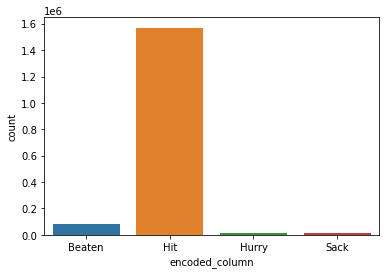

In [36]:
#plot
print(df4.encoded_column.value_counts())
class_names = ['Beaten', 'Hit', 'Hurry',
       'Sack']
ax = sns.countplot(x=df4.encoded_column); 
ax.set_xticklabels(class_names)
plt.show()

In [37]:
# Divide by class
df_class_0    = df4[df4.encoded_column == 'pff_beatenByDefender'] #class with more samples
df_class_1    = df4[df4.encoded_column == 'pff_hurryAllowed'] #class with more samples
df_class_2    = df4[df4.encoded_column == 'pff_hitAllowed'] #class with more samples
df_class_3    = df4[df4.encoded_column == 'pff_sackAllowed'] #class with fewer samples
count_class_3 = len(df_class_3)

Random Under-Sampling:
pff_beatenByDefender    15011
pff_hurryAllowed        15011
pff_hitAllowed          15011
pff_sackAllowed         15011
Name: encoded_column, dtype: int64


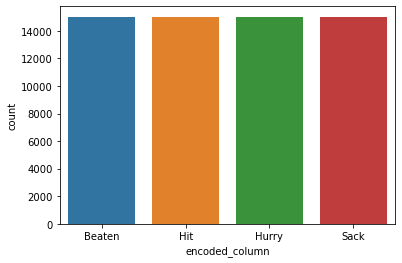

In [38]:
df_class_0_under = df_class_0.sample(count_class_3, replace=True)
df_class_1_under = df_class_1.sample(count_class_3, replace=True)
df_class_2_under = df_class_2.sample(count_class_3, replace=True)
df_new = pd.concat([df_class_0_under, df_class_1_under], axis=0) 
df_new = pd.concat([df_new, df_class_2_under], axis=0)
df_under         = pd.concat([df_new, df_class_3], axis=0)
print('Random Under-Sampling:')
print(df_under.encoded_column.value_counts())
#plot
ax = sns.countplot(x=df_under.encoded_column); 
ax.set_xticklabels(class_names)
plt.show()

In [39]:
df_under.head()

,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,defendersInBox,pff_playAction,penaltyCommitted,pff_positionLinedUp_LG,pff_positionLinedUp_LT,pff_positionLinedUp_RG,pff_positionLinedUp_RT,homeOrAway_home,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT,"personnelO_0 RB, 0 TE, 5 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_1 RB, 1 TE, 2 WR,1 LB","personnelO_1 RB, 1 TE, 3 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_1 RB, 4 TE, 0 WR","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_2 QB, 1 RB, 3 TE, 0 WR","personnelO_2 QB, 2 RB, 0 TE, 2 WR","personnelO_2 QB, 2 RB, 1 TE, 1 WR","personnelO_2 QB, 6 OL, 1 RB, 1 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR","personnelO_2 RB, 1 TE, 2 WR","personnelO_2 RB, 2 TE, 1 WR",...,"personnelD_1 DL, 3 LB, 7 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_2 DL, 5 LB, 4 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_4 DL, 4 LB, 3 DB","personnelD_4 DL, 5 LB, 2 DB","personnelD_4 DL, 6 LB, 1 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_5 DL, 5 LB, 1 DB","personnelD_6 DL, 2 LB, 3 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_6 DL, 4 LB, 1 DB",dropBackType_DESIGNED_ROLLOUT_LEFT,dropBackType_DESIGNED_ROLLOUT_RIGHT,dropBackType_DESIGNED_RUN,dropBackType_SCRAMBLE,dropBackType_SCRAMBLE_ROLLOUT_LEFT,dropBackType_SCRAMBLE_ROLLOUT_RIGHT,dropBackType_TRADITIONAL,pff_passCoverage_2-Man,pff_passCoverage_Bracket,pff_passCoverage_Cover-0,pff_passCoverage_Cover-1,pff_passCoverage_Cover-2,pff_passCoverage_Cover-3,pff_passCoverage_Cover-6,pff_passCoverage_Goal Line,pff_passCoverage_Prevent,pff_passCoverage_Quarters,pff_passCoverage_Red Zone,pff_passCoverageType_Man,pff_passCoverageType_Zone,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,encoded_column
1255437,1.246514,0.130027,56,1.847431,53502.0,1.592545,52504.0,4.118859,44822.0,1.351518,4343,3,6,23,35,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,pff_beatenByDefender
253436,2.953795,5.111546,26,1.572578,44915.0,2.027116,52483.0,4.837065,43290.0,4.632893,2500,3,11,0,7,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,pff_beatenByDefender
167696,4.669628,1.022239,25,0.750000,46110.0,1.294681,42428.0,3.698919,53431.0,4.173068,4800,1,10,24,24,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,pff_beatenByDefender
266264,4.145157,5.703387,25,0.750000,44813.0,1.065692,45142.0,5.754103,47784.0,4.111083,2700,1,10,14,23,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,pff_beatenByDefender
1307554,2.813296,0.212756,27,0.607454,41231.0,1.220901,46134.0,3.753532,41265.0,3.128354,2931,3,4,3,14,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [41]:
X = df_under.drop(['pff_beatenByDefender', 'pff_hitAllowed', 'pff_hurryAllowed', 'pff_sackAllowed', 'encoded_column'], axis = 1)
y = df_under['encoded_column']

In [42]:
#encode y-values
le = preprocessing.LabelEncoder()
le.fit(y)
classes = le.classes_
y=le.transform(y)
le.classes_

array(['pff_beatenByDefender', 'pff_hitAllowed', 'pff_hurryAllowed',
       'pff_sackAllowed'], dtype=object)

In [43]:
#train test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
param_grid = {
    "criterion":["gini","entropy"], #gini or Entropy
    "n_estimators": [50,60],
    "max_depth":([3]),
    "min_samples_split":([5,10]),
    "max_features": [4],
    "bootstrap":[True,False],    #True or False
}
#Random forest classifier
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
grid.fit(X_tr, y_tr)
best_params = grid.best_params_
print(f"Best paramters: {best_params})")
#make confusion matrix
clf = RandomForestClassifier(**best_params,random_state=0)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)
#
acc = accuracy_score(y_te, y_pred)
cm = confusion_matrix(y_te, y_pred)
print(f"Validation accuracy:%3.3f"%acc)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    8.4s finished


Best paramters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 60})
Validation accuracy:0.444


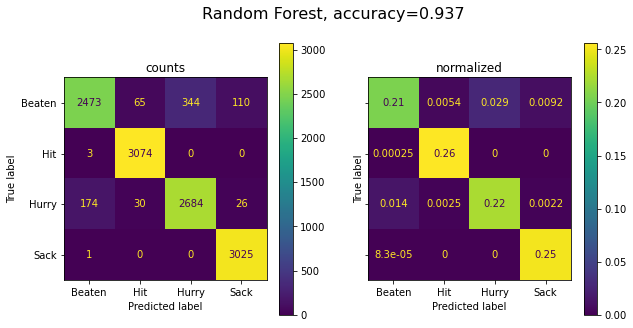

In [50]:
#Random forest classifier
clf = RandomForestClassifier(n_estimators=90,random_state=42,max_depth=20)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)
acc = accuracy_score(y_te, y_pred)
cm = confusion_matrix(y_te, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names ) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=class_names) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('Random Forest, accuracy=%2.3f'%(acc), fontsize=16);

In [51]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2992
           1       0.97      1.00      0.98      3077
           2       0.89      0.92      0.90      2914
           3       0.96      1.00      0.98      3026

    accuracy                           0.94     12009
   macro avg       0.94      0.94      0.94     12009
weighted avg       0.94      0.94      0.94     12009



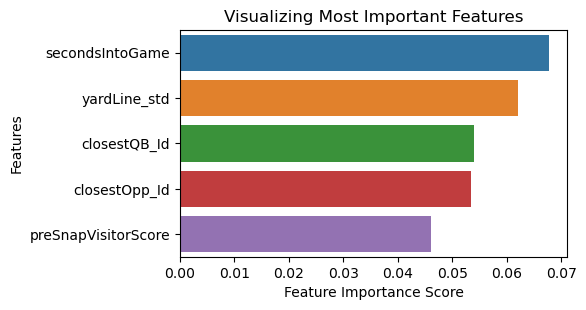

In [52]:
#view feature importance
features = X.columns.tolist()
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False).head(5)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(5, 3),dpi= 100)  #original shape was 8.1, 10
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Most Important Features")
plt.show()